In [1]:
import pandas as pd

import neutcurve


/fh/fast/bloom_j/software/conda_v2/envs/BloomLab/lib/python3.6/site-packages/dmslogo/logo.py:40: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  matplotlib.font_manager.findSystemFonts(_FONT_PATH)))


In [2]:
CBP = neutcurve.colorschemes.CBPALETTE
CBM = neutcurve.colorschemes.CBMARKERS

In [3]:
df = pd.read_csv('./neut_curves/spike_fracinfect_serum.csv')

In [24]:
pos_serum_df = df[df['serum'] == 'COVID+'].copy()
pos_serum_df.drop([0, 11, 22, 33, 44, 55], inplace=True)
pos_serum_df.replace('COVID+', 'Confirmed COVID-19+', inplace=True)
display(pos_serum_df[pos_serum_df['virus'] == 'Spike'])

,serum,virus,replicate,concentration,fraction infectivity
1,Confirmed COVID-19+,Spike,1,0.000003,1.327298
2,Confirmed COVID-19+,Spike,1,0.000008,1.140028
3,Confirmed COVID-19+,Spike,1,0.000021,1.291330
4,Confirmed COVID-19+,Spike,1,0.000051,1.320384
5,Confirmed COVID-19+,Spike,1,0.000128,0.973290
6,Confirmed COVID-19+,Spike,1,0.000320,0.647270
7,Confirmed COVID-19+,Spike,1,0.000800,0.487804
8,Confirmed COVID-19+,Spike,1,0.002000,0.092522
9,Confirmed COVID-19+,Spike,1,0.005000,0.027815
10,Confirmed COVID-19+,Spike,1,0.012500,0.015621


In [5]:
naive_df = df[(df['serum'] == 'Pool 2017-2018') |
              (df['serum'] == 'Naive, 69 yo')].copy().reset_index(drop=True)
naive_df.drop([0, 11, 22, 33, 44, 55, 66, 77, 88, 99, 110, 121], inplace=True)
naive_df.replace('Pool 2017-2018', 'Pooled Serum, 2017-2018', inplace=True)
naive_df.replace('Naive, 69 yo', 'Individual Serum, 1989', inplace=True)

In [6]:
ACE2_df = df[(df['serum'] == 'ACE2')].copy()

In [7]:
pos_serum_fits = neutcurve.CurveFits(pos_serum_df, fixtop=False)
naive_serum_fits = neutcurve.CurveFits(naive_df)
ACE2_fits = neutcurve.CurveFits(ACE2_df, fixtop=False)

The IC50 is 0.000482
This ia a dilution of 1:2076.0.


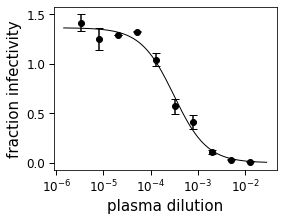

In [8]:
curve = pos_serum_fits.getCurve(serum='Confirmed COVID-19+', virus='Spike', replicate='average')
print(f"The IC50 is {curve.ic50():.3g}")
print(f"This ia a dilution of 1:{1/curve.ic50():.5}.")
fig, ax = curve.plot(xlabel='plasma dilution')

The IC50 is 0.00075
This ia a dilution of 1:1333.9.


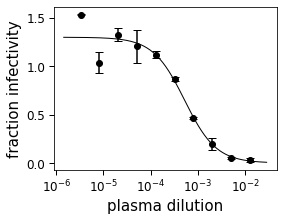

In [9]:
curve = pos_serum_fits.getCurve(serum='Confirmed COVID-19+', virus='Spike, ALAYT', replicate='average')
print(f"The IC50 is {curve.ic50():.3g}")
print(f"This ia a dilution of 1:{1/curve.ic50():.5}.")
fig, ax = curve.plot(xlabel='plasma dilution')

The IC50 is 0.000623
This ia a dilution of 1:1605.1.


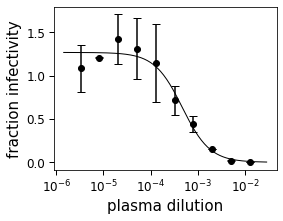

In [10]:
curve = pos_serum_fits.getCurve(serum='Confirmed COVID-19+', virus='Spike, HA Tail', replicate='average')
print(f"The IC50 is {curve.ic50():.3g}")
print(f"This ia a dilution of 1:{1/curve.ic50():.5g}.")
fig, ax = curve.plot(xlabel='plasma dilution')

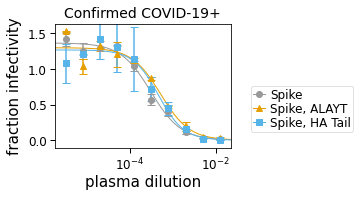

In [11]:
fig, axes = pos_serum_fits.plotSera(sera=['Confirmed COVID-19+'], xlabel='plasma dilution')
fig.savefig('./SARS-CoV-2_lentiviral_pseudotype/figures/200417_full_neut_positive.png', bbox_inches='tight')

The IC50 is 2.49 ug/mL


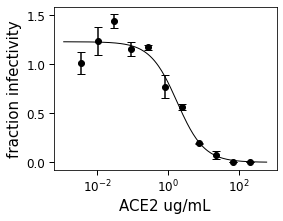

In [12]:
curve = ACE2_fits.getCurve(serum='ACE2', virus='Spike', replicate='average')
print(f"The IC50 is {curve.ic50():.3g} ug/mL")
fig, ax = curve.plot(xlabel='ACE2 ug/mL')

The IC50 is 1.75 ug/mL


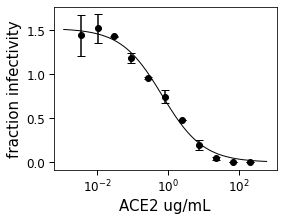

In [13]:
curve = ACE2_fits.getCurve(serum='ACE2', virus='Spike, ALAYT', replicate='average')
print(f"The IC50 is {curve.ic50():.3g} ug/mL")
fig, ax = curve.plot(xlabel='ACE2 ug/mL')

The IC50 is 0.251 ug/mL


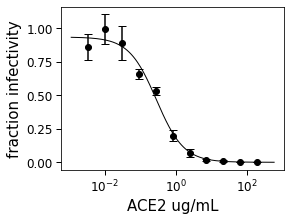

In [14]:
curve = ACE2_fits.getCurve(serum='ACE2', virus='Spike, HA Tail', replicate='average')
print(f"The IC50 is {curve.ic50():.3g} ug/mL")
fig, ax = curve.plot(xlabel='ACE2 ug/mL')

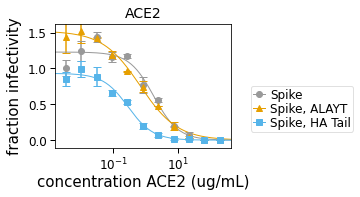

In [15]:
fig, axes = ACE2_fits.plotSera(sera=['ACE2'], xlabel='concentration ACE2 (ug/mL)')
fig.savefig('./SARS-CoV-2_lentiviral_pseudotype/figures/200417_full_neut_ACE2.png', bbox_inches='tight')

/fh/fast/bloom_j/software/conda_v2/envs/BloomLab/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


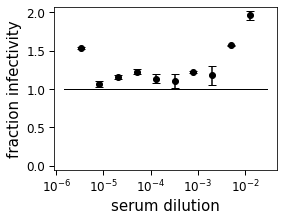

In [16]:
curve = naive_serum_fits.getCurve(serum='Pooled Serum, 2017-2018', virus='Spike', replicate='average')
#print(f"The IC50 is {curve.ic50():.3g} ug/mL")
fig, ax = curve.plot(xlabel='serum dilution')

/fh/fast/bloom_j/software/conda_v2/envs/BloomLab/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


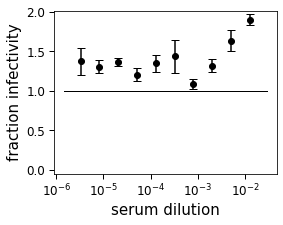

In [17]:
curve = naive_serum_fits.getCurve(serum='Pooled Serum, 2017-2018', virus='Spike, ALAYT', replicate='average')
#print(f"The IC50 is {curve.ic50():.3g} ug/mL")
fig, ax = curve.plot(xlabel='serum dilution')

/fh/fast/bloom_j/software/conda_v2/envs/BloomLab/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


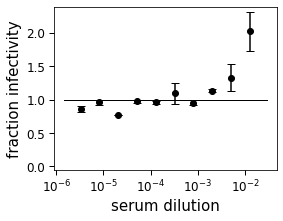

In [18]:
curve = naive_serum_fits.getCurve(serum='Pooled Serum, 2017-2018', virus='Spike, HA Tail', replicate='average')
#print(f"The IC50 is {curve.ic50():.3g} ug/mL")
fig, ax = curve.plot(xlabel='serum dilution')

/fh/fast/bloom_j/software/conda_v2/envs/BloomLab/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/fh/fast/bloom_j/software/conda_v2/envs/BloomLab/lib/python3.6/site-packages/neutcurve/hillcurve.py:610: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m)**s)


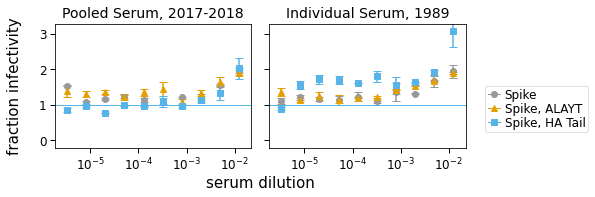

In [19]:
fig, axes = naive_serum_fits.plotSera(sera=['Pooled Serum, 2017-2018', 'Individual Serum, 1989'], xlabel='serum dilution')
fig.savefig('./SARS-CoV-2_lentiviral_pseudotype/figures/200417_full_neut_naives.png', bbox_inches='tight')